Importing necessary libraries

In [18]:
pip install yfinance

In [19]:
pip install pmdarima

In [20]:
import yfinance as yf

In [21]:
df=yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [23]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima

Filter data for the year 2017 onwards

In [24]:
df = df[df.index.year >= 2017]

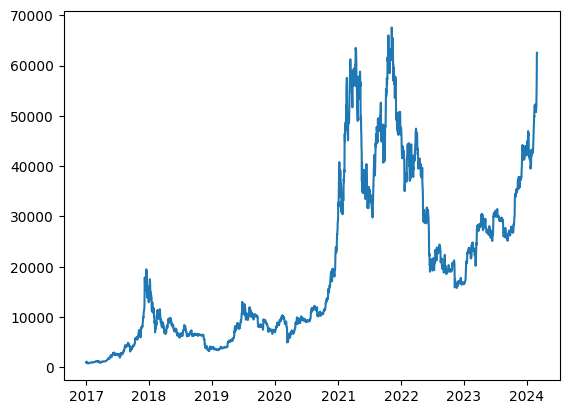

In [25]:
plt.plot(df.index,df['Adj Close'])
plt.show()

Splitting data into training and testing sets

In [26]:
to_row=int(len(df)*0.8)

traindata=list(df[0:to_row]['Adj Close'])
testdata=list(df[to_row:]['Adj Close'])

Plotting training and testing data

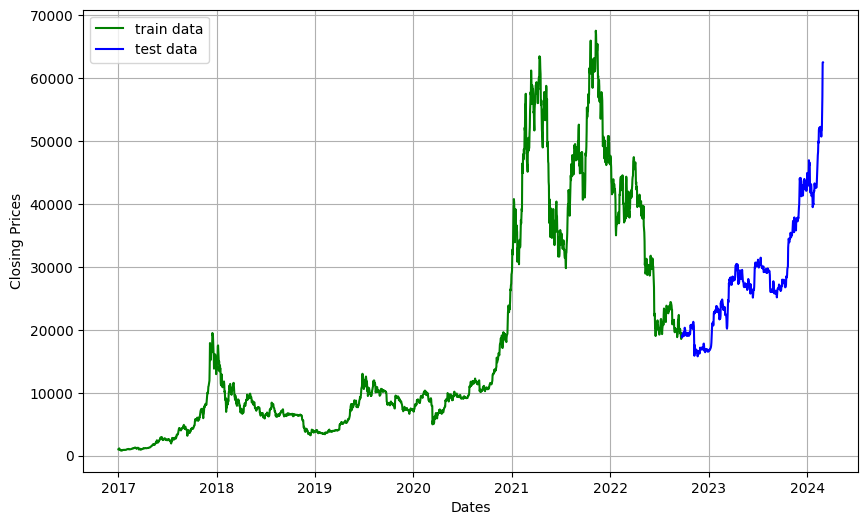

In [27]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green',label='train data')
plt.plot(df[to_row:]['Adj Close'],'blue',label='test data')
plt.legend()

In [28]:
model_predictions=[]
n_test_obser=len(testdata)

In [29]:
for i in range(n_test_obser):
    model = ARIMA(traindata, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]  # Forecasted value
    model_predictions.append(yhat)
    actual_test_value = [testdata[i]]  # Wrap the test value in a list
    traindata.extend(actual_test_value)

In [30]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2615
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -21524.736
Date:                Thu, 29 Feb 2024   AIC                          43059.473
Time:                        12:19:56   BIC                          43088.816
Sample:                             0   HQIC                         43070.102
                               - 2615                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0165      0.012     -1.388      0.165      -0.040       0.007
ar.L2          0.0216      0.012      1.875      0.061      -0.001       0.044
ar.L3          0.0250      0.013      1.977      0.0

Visualization of predicted vs actual prices

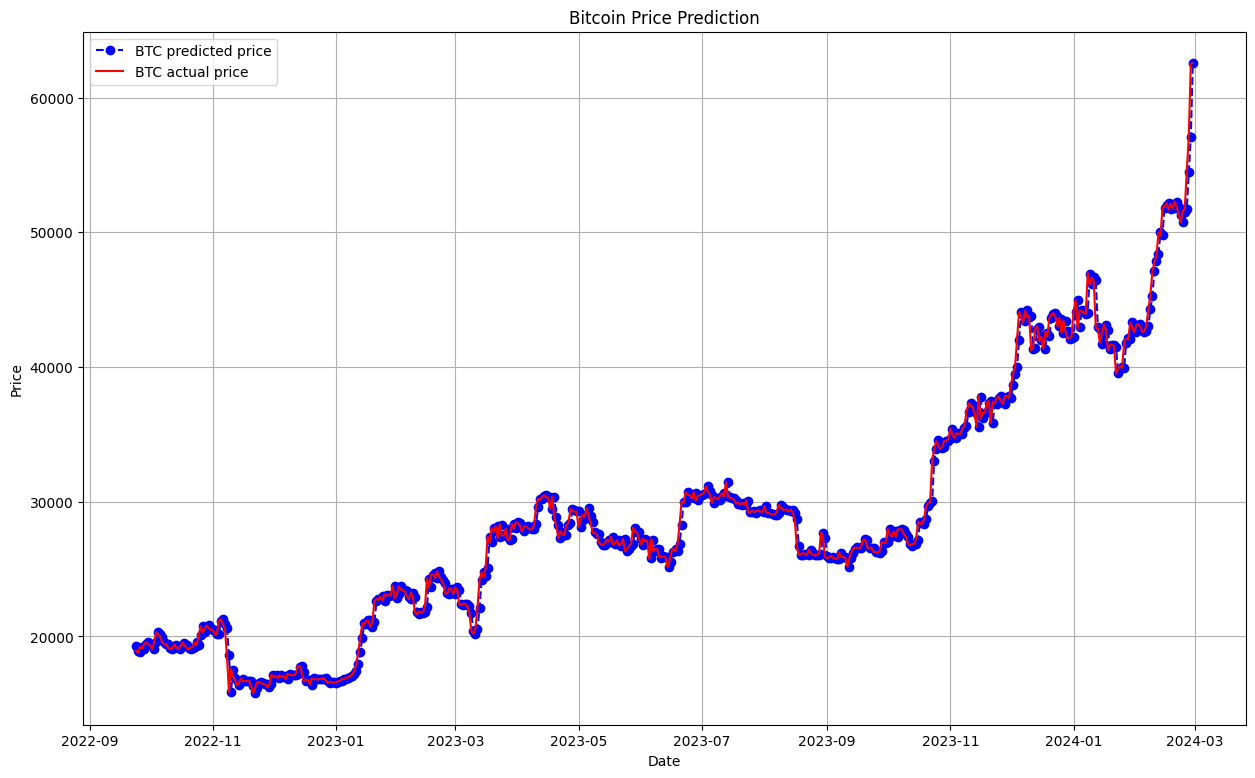

In [31]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range=df[to_row:].index

plt.plot(date_range,model_predictions,color='blue',marker='o',linestyle='dashed',label='BTC predicted price')
plt.plot(date_range,testdata,color='red',label='BTC actual price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
mape=np.mean(np.abs(np.array(model_predictions[:1])-np.array(testdata))/np.abs(testdata))
print('MAPE:'+str(mape))

MAPE:0.3020385021809068


Calculating RMSE and MAE

In [33]:
rmse = np.sqrt(mean_squared_error(testdata, model_predictions))
mae = mean_absolute_error(testdata, model_predictions)

print('RMSE:', rmse)
print('MAE:', mae)

RMSE: 741.4423799372339
MAE: 460.1272917788049
